In [21]:
import gzip
import sys
from pympler import asizeof
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

text = "Your text data here"
text_en = text.encode('utf-8')
print( f"size of text: [{text}] : is {sys.getsizeof(text)} bytes" )
print( f"size of encoded text : [{text_en}] : is {sys.getsizeof( text_en )} bytes" )

text_com = gzip.compress(text.encode('utf-8'))
text_en_com = gzip.compress(text_en)
print( sys.getsizeof( text_com))
print(text_com)

print(f"de-compress: {gzip.decompress(text_com).decode()}")

size of text: [Your text data here] : is 68 bytes
size of encoded text : [b'Your text data here'] : is 52 bytes
72
b'\x1f\x8b\x08\x00\xc1\xeard\x02\xff\x8b\xcc/-R(I\xad(QHI,IT\xc8H-J\x05\x00\xc1\xca\x8c_\x13\x00\x00\x00'
de-compress: Your text data here


In [54]:
file_path = "data.json"
def write_dict_file(data):
    d = load_data_file()
    if d:
        d.extends(data)
        # Open the file in wrte mode
        with open(file_path , "w") as file:
            # Write the dictionary as a JSON string to the file
            json.dump(d, file)
        return True
    else: return False

def load_data_file():
    '''load current data and append new data'''
    data = None
    with open(file_path, "r") as file:
        data = json.load(file)
    return data

In [93]:
from serpapi import GoogleSearch

class Authors(object):
  def __init__(self) -> None:
    '''constructor for the class.'''

  def search_scholar(self, ):
    '''search author from google scholar...'''
    search = GoogleSearch({
        "engine": "google_scholar",
        "q": "nlp",
        "author": "Mercy Mpinganjira",
        "location": "south africa",
        "api_key": "623e7e74cde13a07079ea444adbbb7b0fd7070796b34b061e21fc1be638c7c9b"
      })
    result = search.get_dict()
    return result['organic_results']

  def search_author(self, author_id: str ):
    '''search result by author'''
    search = GoogleSearch({
      "engine": "google_scholar_author",
      "author_id": author_id,
      "api_key": "623e7e74cde13a07079ea444adbbb7b0fd7070796b34b061e21fc1be638c7c9b"
    })
    result = search.get_dict()
    return result

  def get_author_profile(self, names: str):
    params = {
      "engine": "google_scholar_profiles",
      "mauthors": names,
      "api_key": "623e7e74cde13a07079ea444adbbb7b0fd7070796b34b061e21fc1be638c7c9b"
    }
    search = GoogleSearch(params)
    results = search.get_dict()
    profiles = results["profiles"]
    return profiles

In [94]:
# 
a_name = "Mercy Mpinganjira"
a_obj = Authors()
# a_obj.



# r = search_author()
# print(f"{r.keys()}")
# r['co_authors']

[{'name': 'Mercy Mpinganjira', 'link': 'https://scholar.google.com/citations?hl=en&user=ry6x3GUAAAAJ', 'serpapi_link': 'https://serpapi.com/search.json?author_id=ry6x3GUAAAAJ&engine=google_scholar_author&hl=en', 'author_id': 'ry6x3GUAAAAJ', 'affiliations': 'Professor, University of Johannesburg', 'email': 'Verified email at uj.ac.za', 'cited_by': 2188, 'interests': [{'title': 'Digital Marketing and Consumer Behaviour', 'serpapi_link': 'https://serpapi.com/search.json?engine=google_scholar_profiles&hl=en&mauthors=label%3Adigital_marketing_and_consumer_behaviour', 'link': 'https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=label:digital_marketing_and_consumer_behaviour'}], 'thumbnail': 'https://scholar.googleusercontent.com/citations?view_op=small_photo&user=ry6x3GUAAAAJ&citpid=1'}]


In [ ]:
# write to file
# print(result['organic_results'])
available_data = load_data_file()
# print(available_data)
if available_data:
    write_dict_file( result['organic_results'].extend(available_data) )
else:
    write_dict_file( result['organic_results'] )
# write_dict_file( result['organic_results'] )

In [57]:
print(result.keys())
len( result['organic_results'] )

dict_keys(['search_metadata', 'search_parameters', 'search_information', 'organic_results', 'related_searches', 'pagination', 'serpapi_pagination'])


20

In [40]:
# data visualisation
with open("./articles.json") as obj:
    data = json.load(obj)
data[0]

{'title': 'Modeling code-switching speech on under-resourced languages for language identification',
 'link': 'https://scholar.google.com/citations?view_op=view_citation&hl=en&user=0L3EvQYAAAAJ&citation_for_view=0L3EvQYAAAAJ:UeHWp8X0CEIC',
 'citation_id': '0L3EvQYAAAAJ:UeHWp8X0CEIC',
 'authors': 'KR Mabokela, MJ Manamela, M Manaileng',
 'publication': 'Spoken Language Technologies for Under-Resourced Languages, 2014',
 'cited_by': {'value': 26,
  'link': 'https://scholar.google.com/scholar?oi=bibs&hl=en&cites=18191802244881488859',
  'serpapi_link': 'https://serpapi.com/search.json?cites=18191802244881488859&engine=google_scholar&hl=en',
  'cites_id': '18191802244881488859'},
 'year': '2014'}

In [41]:
ds = pd.DataFrame( [{"title":d['title'], "year":d['year'], 'cited':d['cited_by']['value']} for d in data] )
# replace NaN with zero.
ds.fillna(0, inplace=True)
ds['title'] = ds['title'].apply( lambda x : x.lower() )
ds.head()

,title,year,cited
0,modeling code-switching speech on under-resour...,2014,26.0
1,an integrated language identification for code...,2013,8.0
2,a multilingual asr of sepedi-english code-swit...,2019,3.0
3,a sentiment corpus for south african under-res...,2022,2.0
4,phone clustering methods for multilingual lang...,2020,2.0


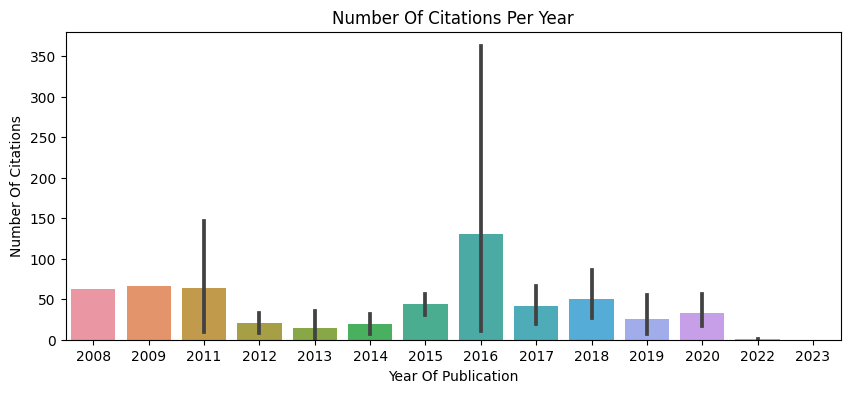

In [43]:
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(data=ds, x="year", y="cited", order=sorted(ds['year'].unique()) )
plt.title("Number Of Citations Per Year")
plt.xlabel("Year Of Publication")
plt.ylabel("Number Of Citations")
plt.show()